## Notebook

This notebook contains the documentation of the cleaning and modeling of machine learning for predicting poisonous mushrooms. This project implements a few ML algorithms on a normal clean dataset, as well as a version with reduced dimensions from Principal Component Analysis (PCA) for some of the algorithms.

## Table of Contents

**Background**

- The Data
- The Models

**Data Preprocessing**

- Importing dependencies
- Checking unique and missing values
- Deciding on columns with missing values
- Separating, scaling, and preprocessing data for models
- Creating a PCA of the data
- Splitting the Data

**Building and Testing the Models**

**Results and Analysis**


### The Data

The data used is the Secondary Mushroom Dataset by Dennis Wagner, D. Heider, and Georges Hattab. From 2021, courtesy of UC Irvine.

https://archive.ics.uci.edu/dataset/848/secondary+mushroom+dataset

The features used for the models (X) are different attributes of mushrooms, like color, size, and length. The target variable (y) is the `class` column, containing binary information about whether or not a given mushroom is poisonous.

### The Models

Several models will be created. Some will be trained on the typical preprocessed data, while others will be trained on pca data. This notebook will show the differences in performance between the models.

## Data Preprocessing

### Importing Dependencies

Several modules from the Scikit Learn library will be used:

- `StandardScaler`, `PCA`, and `train_test_split` will prepare the data into a format suitable for machine learning.
- `RandomForestClassifier` is the algorithm that the models will be based on.
- `confusion_matrix, accuracy_score, classification_report` from `sklearn.metrics` will evaluate the performance of the models using different metrics.

In [1]:
# import dependencies
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd

In [2]:
# read in csv data
df = pd.read_csv("Data Sources/SQL_Mushroom_Data.csv", delimiter=',')

In [3]:
df # view the dataset

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,...,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61064,p,1.18,s,s,y,f,f,f,f,3.93,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,a
61065,p,1.27,f,s,y,f,f,f,f,3.18,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,a
61066,p,1.27,s,s,y,f,f,f,f,3.86,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,u
61067,p,1.24,f,s,y,f,f,f,f,3.56,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,u


### Checking unique and missing values

It appears that there are some empty null values. Below is a table showing all of the unique and missing values for each column.

In [4]:
# creating a summary table showing each column, its data type, number of unique values, and missing values
summary_data = [(x, df[x].dtype,
                 len(df[x].unique()),
                 len(df[df[x].isna()])) for x in df.columns]

summary_table = pd.DataFrame(summary_data, columns=['Column','Data Type',
                                                    'Unique Values', 'Missing Values'])
summary_table['Percentage'] = round(summary_table['Missing Values'] / len(df), 2)

summary_table.sort_values('Missing Values', ascending=False)

,Column,Data Type,Unique Values,Missing Values,Percentage
14,veil-type,object,2,57892,0.95
18,spore-print-color,object,8,54715,0.90
15,veil-color,object,7,53656,0.88
11,stem-root,object,6,51538,0.84
12,stem-surface,object,9,38124,0.62
7,gill-spacing,object,4,25063,0.41
3,cap-surface,object,12,14120,0.23
6,gill-attachment,object,8,9884,0.16
17,ring-type,object,9,2471,0.04
0,class,object,2,0,0.00


### Deciding on columns with missing values
Five columns contained a significant amount of missing values (more than 60% of the values for that column). Our group ultimately decided to drop those columns entirely. We figured that those columns would not contribute much to the models anyway, since there is so little data.

In [5]:
# dropping columns with excessive missing values (30,000 or more)
df = df.drop(columns=['stem-root', 'stem-surface',
                      'veil-type', 'veil-color',
                      'spore-print-color'], axis=1)

# dropping remaining rows with na values
df = df.dropna()

### Separating, scaling, and preprocessing data for models

X is assigned from dropping the target variable (class) from the rest of the data. It is then split between categorical and numeric columns. `StandardScalar` scales the numerical data, so that equal importance is placed on the features. `pd.get_dummies` is used on the categorical variables to convert them into a format the the algorithm will understand. The two parts were then concatenated back into a single `X_clean` variable.

In [6]:
# separating the target variable
X = df.drop(columns='class')
X = X.reset_index(drop=True)

# separating categorical from numerical features
X_categorical = X.select_dtypes(include='O')
X_numeric = X.select_dtypes(exclude='O')

# scaling numerical features
X_numeric_scaled = StandardScaler().fit_transform(X_numeric)
X_numeric_scaled = pd.DataFrame(X_numeric_scaled, columns=X_numeric.columns)

# getting dummies of the categorical features
dummies = pd.get_dummies(X_categorical, dtype=int)

# concatenating dummies to the numeric columns
X_clean = pd.concat([dummies, X_numeric_scaled], axis=1)

### Creating a PCA version of the data

Because the dataset contains more than 80 columns after preprocessing, a second dataset was created. PCA was used on this dataset using `fit_transform`, reducing the number of dimensions for the model to train on. The `n_components` was set to 5 to allow for the highest accuracy without having more dimensions than needed.

In [7]:
# Instantiate PCA and fit the model
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_clean)

X_pca[:5]

array([[ 1.52215957,  2.6762195 , -0.20311954, -0.06923381,  0.6721044 ],
       [ 1.8258888 ,  2.90185307, -0.25968291, -0.16866367,  0.54134669],
       [ 2.20352225,  2.88626369, -0.10229735, -0.45029988,  0.4511748 ],
       [ 1.7872717 ,  2.5868639 , -0.09511033, -0.36628761,  0.44975115],
       [ 1.90265999,  2.7883144 , -0.11174398, -0.38066276,  0.4834056 ]])

In [8]:
# Calculate the PCA explained variance ratio
pca.explained_variance_ratio_

array([0.20582689, 0.09903994, 0.05742793, 0.05001076, 0.04627046])

### Splitting the data

The training and testing data was split for both models.

In [9]:
# splitting training and testing for regular dataset
X_train, X_test, y_train, y_test = train_test_split(X_clean, df['class'])

# splitting training and testing for pca dataset
X_pca_train, X_pca_test, y_train, y_test = train_test_split(X_pca, df['class'])

## Building and Testing the Models

### Creating Random Forest Model with original data

In [10]:
# create StandardScaler instance for original dataset
scaler = StandardScaler()

In [11]:
# fit Standard Scaler
X_scaler = scaler.fit(X_train)

In [12]:
# scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [13]:
# create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=500, random_state=33)

In [14]:
# fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

In [15]:
# make predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

In [16]:
# calculate the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# calculate the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [17]:
# displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,948,1546
Actual 1,1195,1871


Accuracy Score : 0.5070143884892087
Classification Report
              precision    recall  f1-score   support

           e       0.44      0.38      0.41      2494
           p       0.55      0.61      0.58      3066

    accuracy                           0.51      5560
   macro avg       0.49      0.50      0.49      5560
weighted avg       0.50      0.51      0.50      5560



In [18]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.009888101399870416, 'cap-surface'),
 (0.007417241001571676, 'gill-spacing'),
 (0.006746873815603786, 'gill-attachment'),
 (0.0035342970331279683, 'season'),
 (0.00306909779094556, 'stem-color'),
 (0.00246038180296406, 'cap-diameter'),
 (0.0023545621625131173, 'gill-color'),
 (0.0010936482211472958, 'ring-type'),
 (0.001004321737669755, 'does-bruise-or-bleed'),
 (0.0008968584252683519, 'stem-height'),
 (0.0004873594628224579, 'has-ring'),
 (0.00046470003802197713, 'stem-width'),
 (0.000451973913620932, 'habitat'),
 (0.0003755262384549175, 'cap-color'),
 (0.00024528125559409973, 'cap-shape')]

<Axes: title={'center': 'Features Importances'}, ylabel='1'>

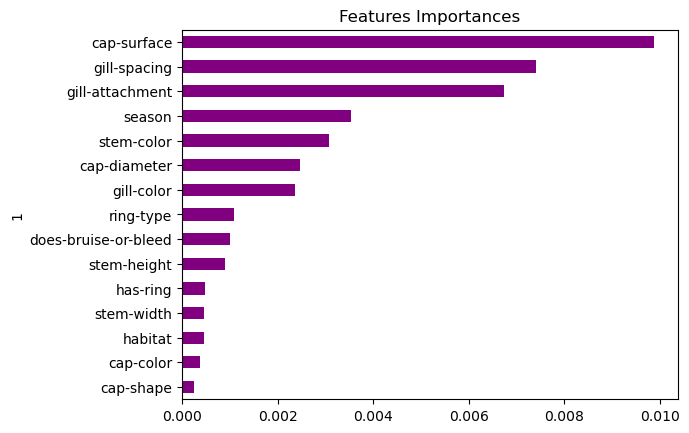

In [19]:
# visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='purple', title= 'Features Importances', legend=False)

### Create Logistic Regression Model with original data

In [20]:
# Import the LogisticRegression module from SKLearn
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
classifier = LogisticRegression(solver='lbfgs',
                                max_iter=200,
                                random_state=3)

# Fit the model using training data
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=200, random_state=3)

In [21]:
# Make a prediction using the testing data
predictions2 = classifier.predict(X_test)

In [22]:
# Generate a confusion matrix for the model
confusion2 = confusion_matrix(y_test, predictions2)
print(confusion2)

[[  43 2451]
 [  78 2988]]


In [23]:
# Print the classification report for the model
classification_test = classification_report(y_test, predictions2)
print(classification_test)

              precision    recall  f1-score   support

           e       0.36      0.02      0.03      2494
           p       0.55      0.97      0.70      3066

    accuracy                           0.55      5560
   macro avg       0.45      0.50      0.37      5560
weighted avg       0.46      0.55      0.40      5560



### Running random forest classifier with pca data

In [24]:
# create StandardScaler instance with pca data
pca_scaler = StandardScaler()

In [25]:
# fit pca data Standard Scaler
X_pca_scaler = scaler.fit(X_pca_train)

In [26]:
# scale the pca data
X_pca_train_scaled = X_pca_scaler.transform(X_pca_train)
X_pca_test_scaled = X_pca_scaler.transform(X_pca_test)

In [27]:
# Create a random forest classifier with pca data
rf_pca_model = RandomForestClassifier(n_estimators=300, random_state=33)

In [28]:
# Fitting the model with pca data
rf_pca_model = rf_pca_model.fit(X_pca_train_scaled, y_train)

In [29]:
# Making predictions using the testing data with pca data
pca_predictions = rf_pca_model.predict(X_pca_test_scaled)

In [30]:
# Calculating the confusion matrix with pca data
pca_cm = confusion_matrix(y_test, pca_predictions)
pca_cm_df = pd.DataFrame(
    pca_cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score with pca data
pca_acc_score = accuracy_score(y_test, pca_predictions)

In [31]:
# Displaying results with pca data
print("Confusion Matrix")
display(pca_cm_df)
print(f"Accuracy Score : {pca_acc_score}")
print("Classification Report")
print(classification_report(y_test, pca_predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,2462,32
Actual 1,41,3025


Accuracy Score : 0.9868705035971223
Classification Report
              precision    recall  f1-score   support

           e       0.98      0.99      0.99      2494
           p       0.99      0.99      0.99      3066

    accuracy                           0.99      5560
   macro avg       0.99      0.99      0.99      5560
weighted avg       0.99      0.99      0.99      5560



In [32]:
# Random Forests in sklearn will automatically calculate feature importance
pca_importances = rf_pca_model.feature_importances_
# We can sort the features by their importance
sorted(zip([f'PCA {x}' for x in range(1, len(pca_importances) + 1)],
           rf_pca_model.feature_importances_), reverse=False)

[('PCA 1', 0.20357747364912465),
 ('PCA 2', 0.17905587016231253),
 ('PCA 3', 0.33198513182409384),
 ('PCA 4', 0.1285687444269327),
 ('PCA 5', 0.15681277993753615)]

<Axes: title={'center': 'Features Importances'}>

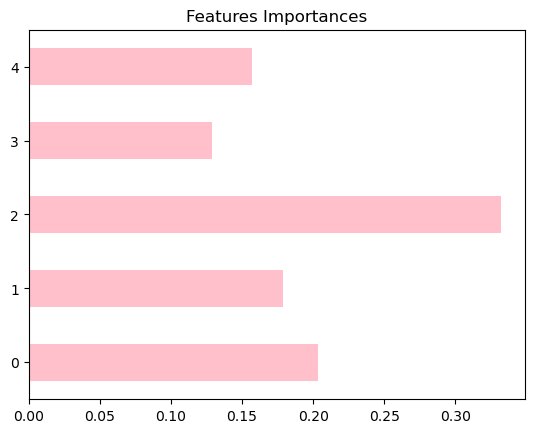

In [33]:
# Visualize the features by importance
pca_importances_df = pd.DataFrame(rf_pca_model.feature_importances_)
pca_importances_df.plot(kind='barh', color='pink', title= 'Features Importances', legend=False)

### Running Logistic Regression Model with PCA data

In [34]:
# Instantiate PCA and fit the model
pca2 = PCA(n_components=3)
X_pca2 = pca2.fit_transform(X_clean)

X_pca2[:5]

array([[ 1.52215954,  2.67622529, -0.2033803 ],
       [ 1.82588877,  2.9018596 , -0.25996868],
       [ 2.20352222,  2.88626993, -0.10254284],
       [ 1.78727167,  2.58686818, -0.09532353],
       [ 1.90265996,  2.78832181, -0.11202243]])

In [35]:
# Calculate the PCA explained variance ratio
pca2.explained_variance_ratio_

array([0.20582689, 0.09903994, 0.05742792])

In [36]:
# splitting training and testing for pca dataset
X_pca_train2, X_pca_test2, y_train, y_test = train_test_split(X_pca2, df['class'])

In [37]:
# Import the LogisticRegression module from SKLearn
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
pca_classifier = LogisticRegression(solver='lbfgs',
                                max_iter=300,
                                random_state=3)

# Fit the model using training data
pca_classifier.fit(X_pca_train2, y_train)

LogisticRegression(max_iter=300, random_state=3)

In [38]:
# Make a prediction using the testing data
predictions_pca = pca_classifier.predict(X_pca_test2)

In [39]:
# Generate a confusion matrix for the model
confusion_pca = confusion_matrix(y_test, predictions_pca)
print(confusion_pca)

[[1543  916]
 [ 628 2473]]


In [40]:
# Print the classification report for the model
classification_test_pca = classification_report(y_test, predictions_pca)
print(classification_test_pca)

              precision    recall  f1-score   support

           e       0.71      0.63      0.67      2459
           p       0.73      0.80      0.76      3101

    accuracy                           0.72      5560
   macro avg       0.72      0.71      0.71      5560
weighted avg       0.72      0.72      0.72      5560



### YDF (Yggrasil Decision Forest)

In [41]:
# import dependencies
!pip install ydf -U
import ydf
import numpy as np

In [42]:
# Use the ~20% of the examples as the testing set
# and the remaining ~80% of the examples as the training set.
label="class"
np.random.seed(5)
is_test = np.random.rand(len(df)) < 0.2

In [43]:
#split datasets
train_dataset = df[~is_test]
test_dataset = df[is_test]

In [44]:
model2 = ydf.GradientBoostedTreesLearner(label=label, num_trees=100).train(train_dataset)

Train model on 17877 examples
Model trained in 0:00:03.644144


In [45]:
model2.describe()

In [46]:
model2.plot_tree()

In [47]:
model2.evaluate(test_dataset)

Label \ Pred,p,e
p,2433,0
e,0,1929


In [48]:
model2.predict(test_dataset)

array([0.00265542, 0.00265542, 0.00265542, ..., 0.0018112 , 0.00387   ,
       0.00253676], dtype=float32)

In [49]:
model2.analyze(test_dataset)

In [50]:
model3 = ydf.GradientBoostedTreesLearner(label=label, num_trees=1000).train(train_dataset)

Train model on 17877 examples
Model trained in 0:00:41.732543


In [51]:
model3.plot_tree()

In [52]:
print("Test accuracy: ", model3.evaluate(train_dataset).accuracy)

Test accuracy:  1.0


In [53]:
print("Test accuracy: ", model3.evaluate(test_dataset).accuracy)

Test accuracy:  1.0


## Results and Analysis

By far, the random forest model train on PCA data dramatically outperformed the other models. In a case use like this that is safety-related, it it crucial to obtain a near-perfect accuracy. Likewise, another major component is eliminating as much false negatives as possible. The precision and recall values for both outcomes are 98-99%.

The logistic regression model with pca data, while maintaining a recall for poisonous outcomes at 81%, still struggles to keep an overall accuracy of 72%, compared to the random forest model's 99%. This indicates that the pca is complex enough that it requires an algorithm more nuanced than a simple regression.

The worst performing models were the ones trained on the regular, unoptimized dataset. Trained on this data, the random forest and logistic regression algorithms had accuracy scores of 50% and 55%, respectively. Based on these performance metrics, data optimization was a huge help in achieving the desired results.